In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There are two columns Route and Total_Stops where there are 1 null values each. As these are less in numbers we can directly drop this null values

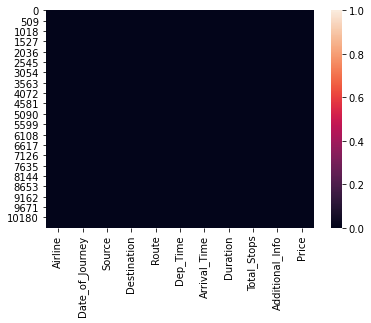

In [5]:
#using heatmap to check the null values
sns.heatmap(df.isnull())

As only one null values in two colums it is difficult to see through heatmap

In [6]:
#statistical summary
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.shape

(10683, 11)

The datasets have 10683 rows and 11 columns including the target column Price

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
#dropping the null value rows
df.dropna(inplace=True)

In [12]:
df.shape

(10682, 11)

# DATA CLEANSING

In [13]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [14]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Analysis
1. Price is the only Numerical column.
2. Jet Airways is the most used flight.
3. Trujet is the least used flight.

In [16]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Printing Unique values for each categorical columns

In [19]:
for i in ['Airline', 'Source','Destination','Total_Stops','Additional_Info']:
    print('Total:',len(df[i].unique()),'\n')
    print(df[i].unique())

Total: 12 

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Total: 5 

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Total: 6 

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Total: 5 

['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
Total: 10 

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


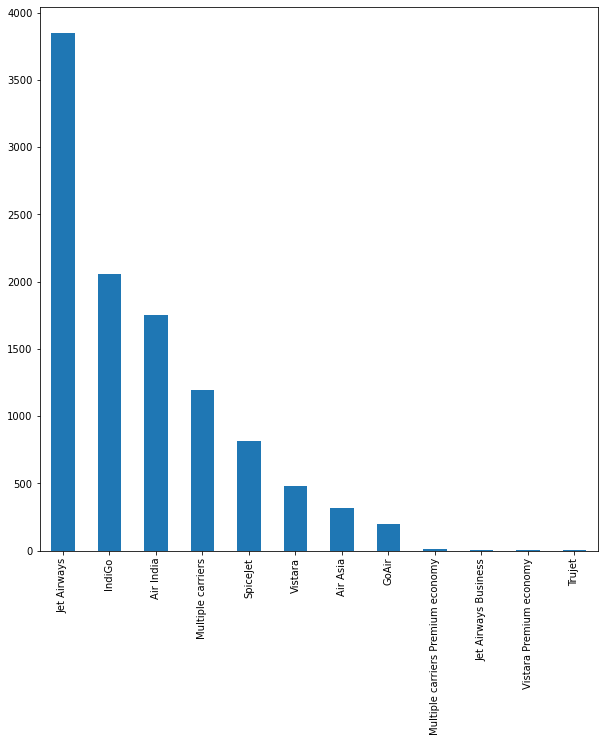

In [20]:
df['Airline'].value_counts().plot.bar(figsize=(10,10))

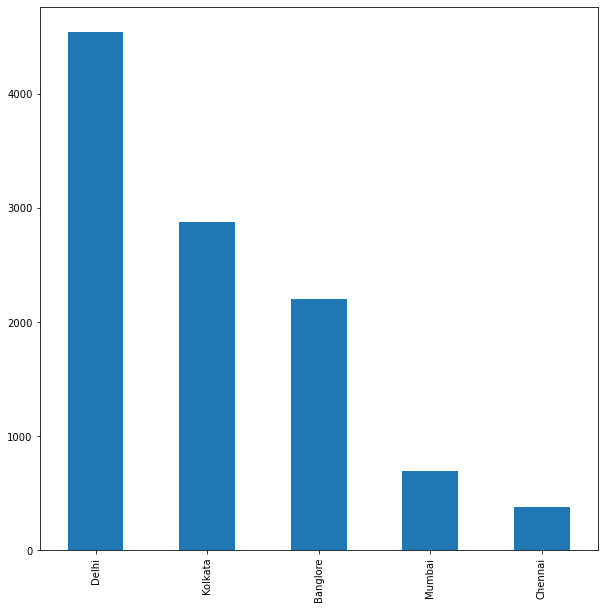

In [21]:
df['Source'].value_counts().plot.bar(figsize=(10,10))

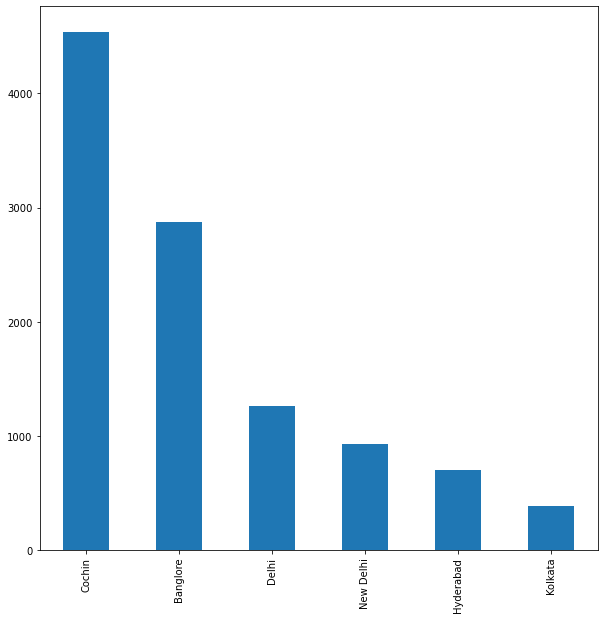

In [22]:
df['Destination'].value_counts().plot.bar(figsize=(10,10))

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [24]:
type(df.Date_of_Journey)

pandas.core.series.Series

In [25]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [27]:
df['Year'] = df.Date_of_Journey.dt.year
df['Month'] = df.Date_of_Journey.dt.month

In [28]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1


In [29]:
df.Year.unique()

array([2019], dtype=int64)

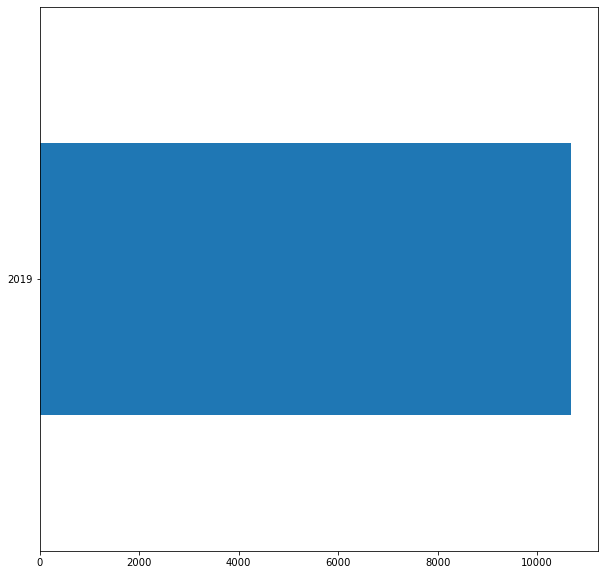

In [30]:
df.Year.value_counts().plot.barh(figsize=(10,10))

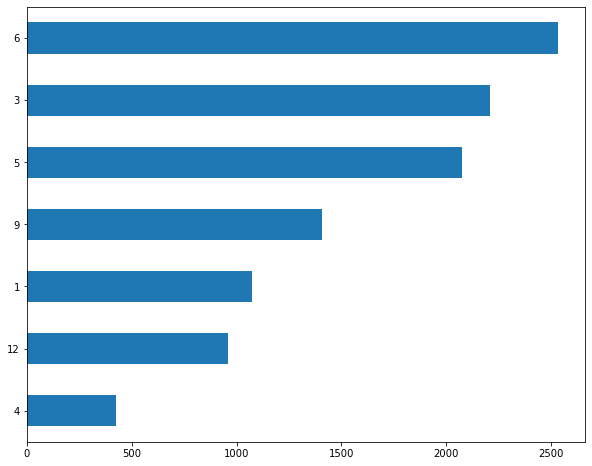

In [31]:
df.Month.value_counts(ascending=True).plot.barh(figsize=(10,8))

In [32]:
df['date'] = df.Date_of_Journey.dt.day

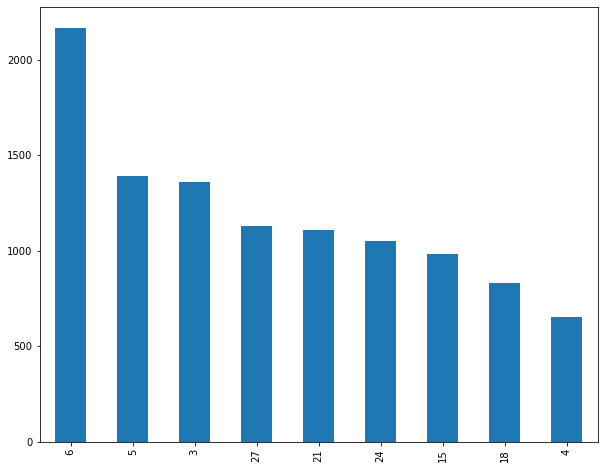

In [33]:
df.date.value_counts().plot.bar(figsize=(10,8))

In [34]:
import datetime
df['Week']  = df.Date_of_Journey.dt.dayofweek

In [35]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,date,Week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9,4,2
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4,27,5
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4,27,5
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1,3,3


In [36]:
df["Week"].value_counts()

3    2290
4    1802
2    1598
0    1491
1    1236
5    1203
6    1062
Name: Week, dtype: int64

In [37]:
weekday = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df.Week = df.Week.map(weekday)

In [38]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,date,Week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,Sun
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5,Sat
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,Fri
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5,Thu
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9,4,Wed
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4,27,Sat
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4,27,Sat
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1,3,Thu


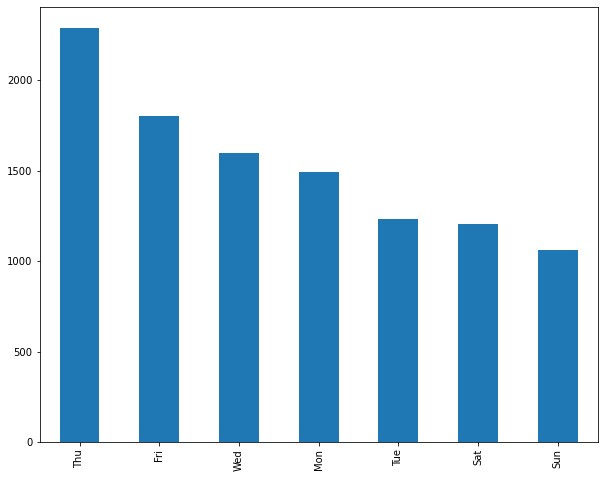

In [39]:
df.Week.value_counts().plot.bar(figsize= (10,8))

In [40]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_hr'] = df.Dep_Time.dt.hour
df['Dep_min'] = df.Dep_Time.dt.hour

In [41]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arr_hr'] = df.Arrival_Time.dt.hour
df['Arr_min'] = df.Arrival_Time.dt.hour

In [42]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-29 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,Sun,22,22,1,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-29 05:50:00,2021-05-29 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,Sat,5,5,13,13
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-29 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6,Fri,9,9,4,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-29 18:05:00,2021-05-29 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5,Thu,18,18,23,23
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-29 16:50:00,2021-05-29 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3,Thu,16,16,21,21


In [46]:
duration_hr = []
duration_min = []

for i in range(len(duration)):
    duration_hr.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [47]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-29 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,Sun,22,22,1,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-29 05:50:00,2021-05-29 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,Sat,5,5,13,13
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-29 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6,Fri,9,9,4,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-29 18:05:00,2021-05-29 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5,Thu,18,18,23,23
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-29 16:50:00,2021-05-29 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3,Thu,16,16,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-05-29 19:55:00,2021-05-29 22:25:00,2h 30m,non-stop,No info,4107,2019,9,4,Wed,19,19,22,22
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-05-29 20:45:00,2021-05-29 23:20:00,2h 35m,non-stop,No info,4145,2019,4,27,Sat,20,20,23,23
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-05-29 08:20:00,2021-05-29 11:20:00,3h,non-stop,No info,7229,2019,4,27,Sat,8,8,11,11
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-05-29 11:30:00,2021-05-29 14:10:00,2h 40m,non-stop,No info,12648,2019,1,3,Thu,11,11,14,14


In [48]:
df['Dur_hr'] = duration_hr
df['Dur_min'] = duration_min

In [49]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-29 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,...,2019,3,24,Sun,22,22,1,1,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-29 05:50:00,2021-05-29 13:15:00,7h 25m,2 stops,No info,...,2019,1,5,Sat,5,5,13,13,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-29 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,...,2019,9,6,Fri,9,9,4,4,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-29 18:05:00,2021-05-29 23:30:00,5h 25m,1 stop,No info,...,2019,12,5,Thu,18,18,23,23,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-29 16:50:00,2021-05-29 21:35:00,4h 45m,1 stop,No info,...,2019,1,3,Thu,16,16,21,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-05-29 19:55:00,2021-05-29 22:25:00,2h 30m,non-stop,No info,...,2019,9,4,Wed,19,19,22,22,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-05-29 20:45:00,2021-05-29 23:20:00,2h 35m,non-stop,No info,...,2019,4,27,Sat,20,20,23,23,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-05-29 08:20:00,2021-05-29 11:20:00,3h,non-stop,No info,...,2019,4,27,Sat,8,8,11,11,3,0
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-05-29 11:30:00,2021-05-29 14:10:00,2h 40m,non-stop,No info,...,2019,1,3,Thu,11,11,14,14,2,40


In [50]:
# Deleting Date_of_Journey, Dep_Time, Arrivl_Time, and Duration
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'],axis=1,inplace=True)

In [51]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,Sun,22,22,1,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,Sat,5,5,13,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,Fri,9,9,4,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,Thu,18,18,23,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,Thu,16,16,21,21,4,45


In [52]:
df['Day_Night'] = np.where(df['Arr_hr']>19,'Night_flight','Day_flight')

In [53]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,Day_Night
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,Sun,22,22,1,1,2,50,Day_flight
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,Sat,5,5,13,13,7,25,Day_flight
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,Fri,9,9,4,4,19,0,Day_flight
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,Thu,18,18,23,23,5,25,Night_flight
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,Thu,16,16,21,21,4,45,Night_flight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,2019,9,4,Wed,19,19,22,22,2,30,Night_flight
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,2019,4,27,Sat,20,20,23,23,2,35,Night_flight
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,2019,4,27,Sat,8,8,11,11,3,0,Day_flight
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,2019,1,3,Thu,11,11,14,14,2,40,Day_flight


In [54]:
### Removing the duplicated features
df = df.drop_duplicates()

In [55]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,Day_Night
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,Sun,22,22,1,1,2,50,Day_flight
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,Sat,5,5,13,13,7,25,Day_flight
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,Fri,9,9,4,4,19,0,Day_flight
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,Thu,18,18,23,23,5,25,Night_flight
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,Thu,16,16,21,21,4,45,Night_flight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,2019,9,4,Wed,19,19,22,22,2,30,Night_flight
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,2019,4,27,Sat,20,20,23,23,2,35,Night_flight
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,2019,4,27,Sat,8,8,11,11,3,0,Day_flight
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,2019,1,3,Thu,11,11,14,14,2,40,Day_flight


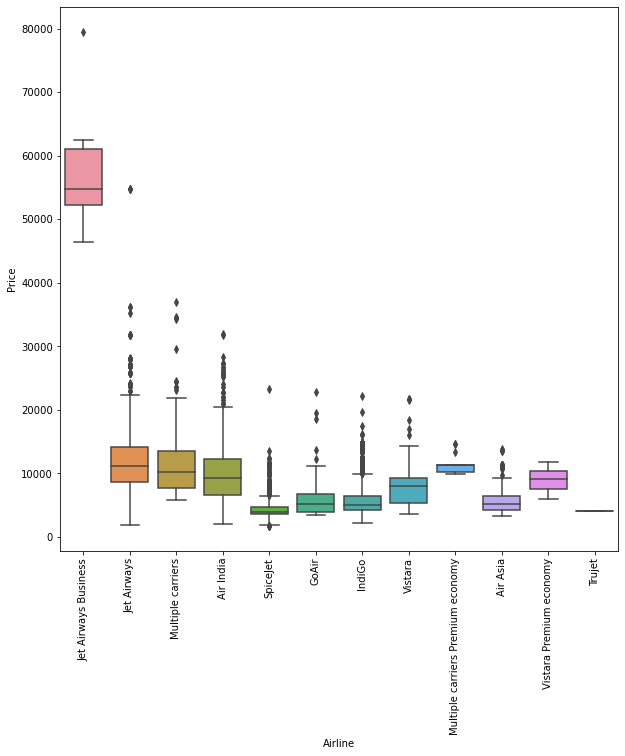

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)

sns.boxplot(x='Airline',y='Price',ax=ax,data= df.sort_values('Price',ascending=False))

In [57]:
airline = df[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)
airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [58]:
source = df[['Source']]
source = pd.get_dummies(source,drop_first=True)
source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [59]:
destination = df[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [60]:
DN = df[['Day_Night']]
DN = pd.get_dummies(DN,drop_first=True)
DN

,Day_Night_Night_flight
0,0
1,0
2,0
3,1
4,1
...,...
10678,1
10679,1
10680,0
10681,0


In [61]:
#### Route and Total stops are almost same they are giving the same data
#### so we can drop Route
df.drop('Route',axis=1,inplace=True)

In [62]:
##### Additional Info has more than 93% of the values as NO- Info 
##### so we can drop this also
df.drop('Additional_Info',axis=1,inplace=True)

In [63]:
### As price increase when the stops are more(According to the dataset) so Ordinal encoding is required
stops = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df['Total_Stops'] = df.Total_Stops.map(stops)

In [64]:
df = pd.concat([df,airline,source,destination,DN],axis=1)

In [65]:
df

,Airline,Source,Destination,Total_Stops,Price,Year,Month,date,Week,Dep_hr,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
0,IndiGo,Banglore,New Delhi,0,3897,2019,3,24,Sun,22,...,0,0,0,0,0,0,0,0,1,0
1,Air India,Kolkata,Banglore,2,7662,2019,1,5,Sat,5,...,0,0,1,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,2019,9,6,Fri,9,...,0,1,0,0,1,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,2019,12,5,Thu,18,...,0,0,1,0,0,0,0,0,0,1
4,IndiGo,Banglore,New Delhi,1,13302,2019,1,3,Thu,16,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,2019,9,4,Wed,19,...,0,0,1,0,0,0,0,0,0,1
10679,Air India,Kolkata,Banglore,0,4145,2019,4,27,Sat,20,...,0,0,1,0,0,0,0,0,0,1
10680,Jet Airways,Banglore,Delhi,0,7229,2019,4,27,Sat,8,...,0,0,0,0,0,1,0,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,2019,1,3,Thu,11,...,0,0,0,0,0,0,0,0,1,0


In [66]:
#### Now we can drop the unwanted columns

df.drop(['Airline','Source','Destination','Day_Night','Year'],axis=1,inplace=True)

In [67]:
weekday = {'Mon':0,'Tue':1,'Wed':2,'Thu':3,'Fri':4,'Sat':5,'Sun':6}

df.Week = df.Week.map(weekday)

In [68]:
df

,Total_Stops,Price,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
0,0,3897,3,24,6,22,22,1,1,2,...,0,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,5,5,5,13,13,7,...,0,0,1,0,0,0,0,0,0,0
2,2,13882,9,6,4,9,9,4,4,19,...,0,1,0,0,1,0,0,0,0,0
3,1,6218,12,5,3,18,18,23,23,5,...,0,0,1,0,0,0,0,0,0,1
4,1,13302,1,3,3,16,16,21,21,4,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2,19,19,22,22,2,...,0,0,1,0,0,0,0,0,0,1
10679,0,4145,4,27,5,20,20,23,23,2,...,0,0,1,0,0,0,0,0,0,1
10680,0,7229,4,27,5,8,8,11,11,3,...,0,0,0,0,0,1,0,0,0,0
10681,0,12648,1,3,3,11,11,14,14,2,...,0,0,0,0,0,0,0,0,1,0


In [69]:
df.shape

(10439, 32)

# Correlation

In [70]:
df.corr()

,Total_Stops,Price,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
Total_Stops,1.000000,0.601140,0.064657,-0.035645,0.006519,-0.065944,-0.065944,0.053032,0.053032,0.729516,...,-0.237040,0.473364,0.049363,-0.261830,0.473364,-0.448584,-0.261830,-0.237040,-0.000174,-0.040108
Price,0.601140,1.000000,0.008027,-0.171473,-0.004862,0.006351,0.006351,0.032217,0.032217,0.503277,...,-0.178664,0.260259,0.014720,-0.229937,0.260259,-0.309331,-0.229937,-0.178664,0.199639,-0.074890
Month,0.064657,0.008027,1.000000,-0.265670,-0.167585,0.029013,0.029013,-0.002992,-0.002992,0.056190,...,-0.015273,0.004673,0.065766,-0.016043,0.004673,0.010002,-0.016043,-0.015273,-0.099163,-0.013342
date,-0.035645,-0.171473,-0.265670,1.000000,-0.092786,-0.007519,-0.007519,-0.000952,-0.000952,-0.047050,...,0.013506,0.107930,-0.065396,-0.012007,0.107930,0.013965,-0.012007,0.013506,-0.099551,-0.010406
Week,0.006519,-0.004862,-0.167585,-0.092786,1.000000,0.005171,0.005171,0.009860,0.009860,0.022308,...,-0.003663,-0.067531,0.147301,-0.047640,-0.067531,-0.026117,-0.047640,-0.003663,-0.040148,0.016928
Dep_hr,-0.065944,0.006351,0.029013,-0.007519,0.005171,1.000000,1.000000,-0.004677,-0.004677,0.000732,...,-0.014373,-0.124285,0.161350,-0.016600,-0.124285,0.007972,-0.016600,-0.014373,-0.022736,0.164211
Dep_min,-0.065944,0.006351,0.029013,-0.007519,0.005171,1.000000,1.000000,-0.004677,-0.004677,0.000732,...,-0.014373,-0.124285,0.161350,-0.016600,-0.124285,0.007972,-0.016600,-0.014373,-0.022736,0.164211
Arr_hr,0.053032,0.032217,-0.002992,-0.000952,0.009860,-0.004677,-0.004677,1.000000,1.000000,0.066841,...,-0.015849,-0.000281,0.055136,-0.035138,-0.000281,-0.037336,-0.035138,-0.015849,-0.002094,0.615336
Arr_min,0.053032,0.032217,-0.002992,-0.000952,0.009860,-0.004677,-0.004677,1.000000,1.000000,0.066841,...,-0.015849,-0.000281,0.055136,-0.035138,-0.000281,-0.037336,-0.035138,-0.015849,-0.002094,0.615336
Dur_hr,0.729516,0.503277,0.056190,-0.047050,0.022308,0.000732,0.000732,0.066841,0.066841,1.000000,...,-0.186858,0.279277,0.140343,-0.233076,0.279277,-0.343747,-0.233076,-0.186858,0.015832,-0.053482


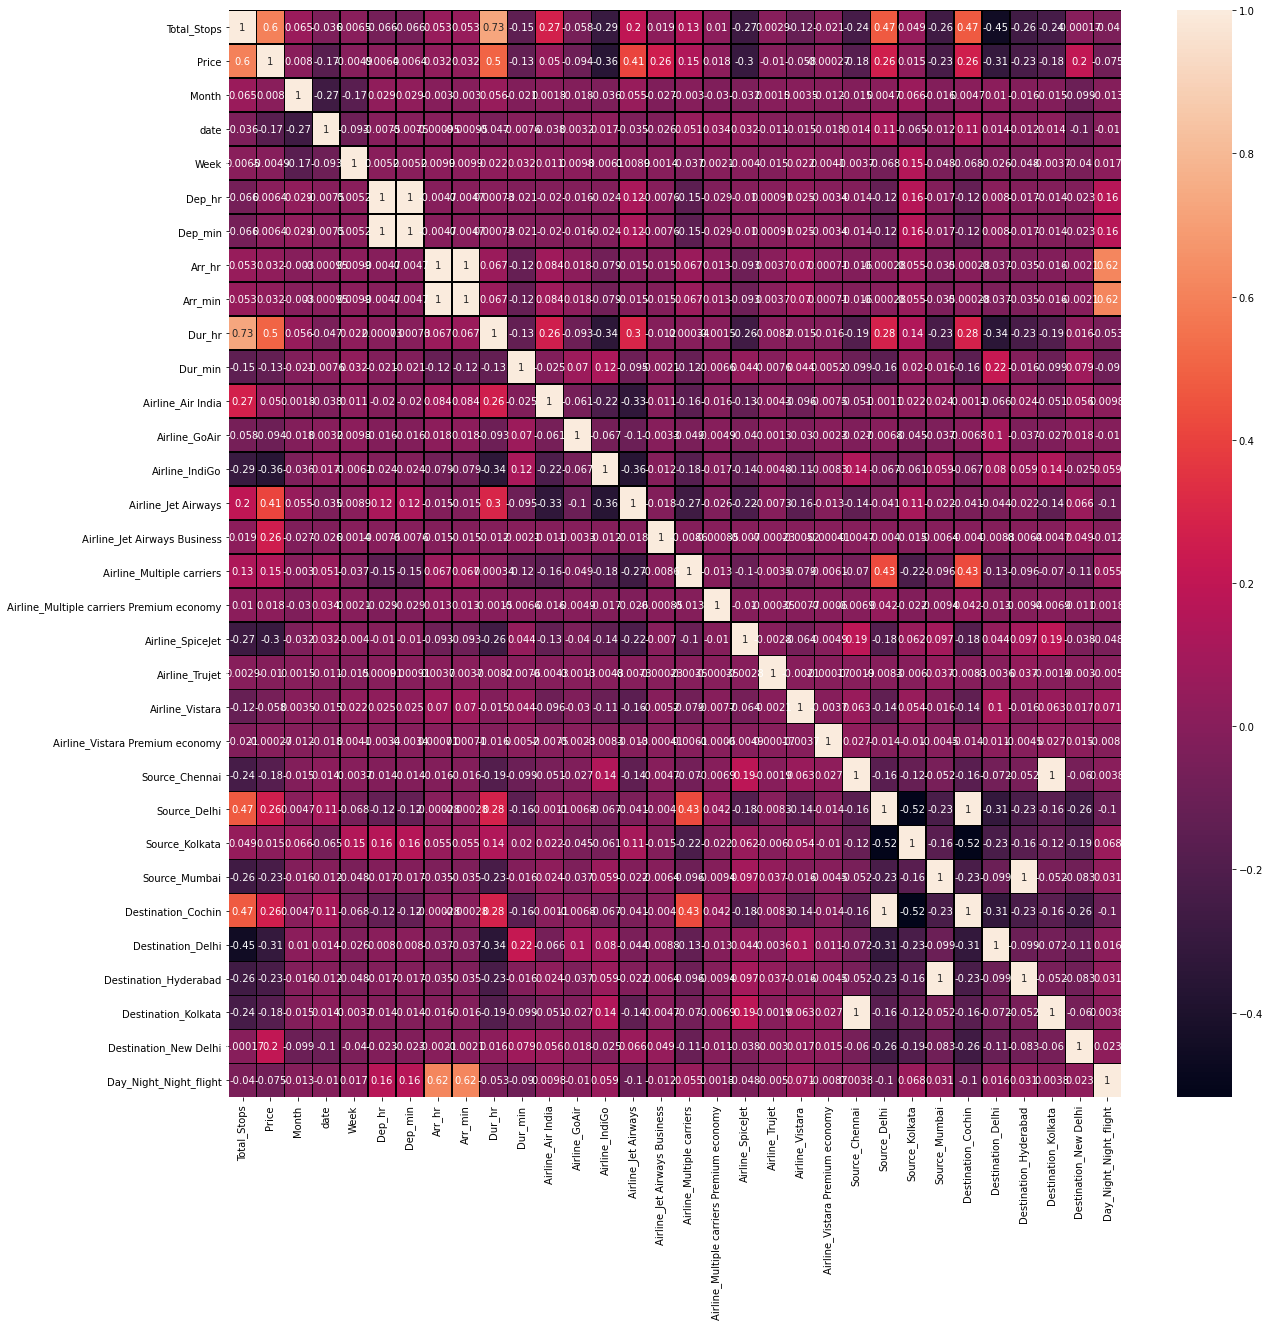

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black")

# Outliers Checking

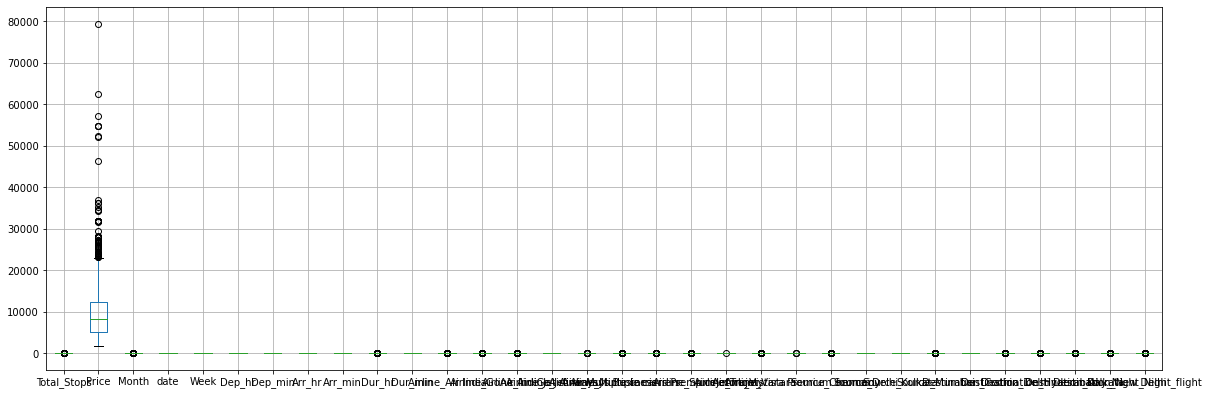

In [72]:
df.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

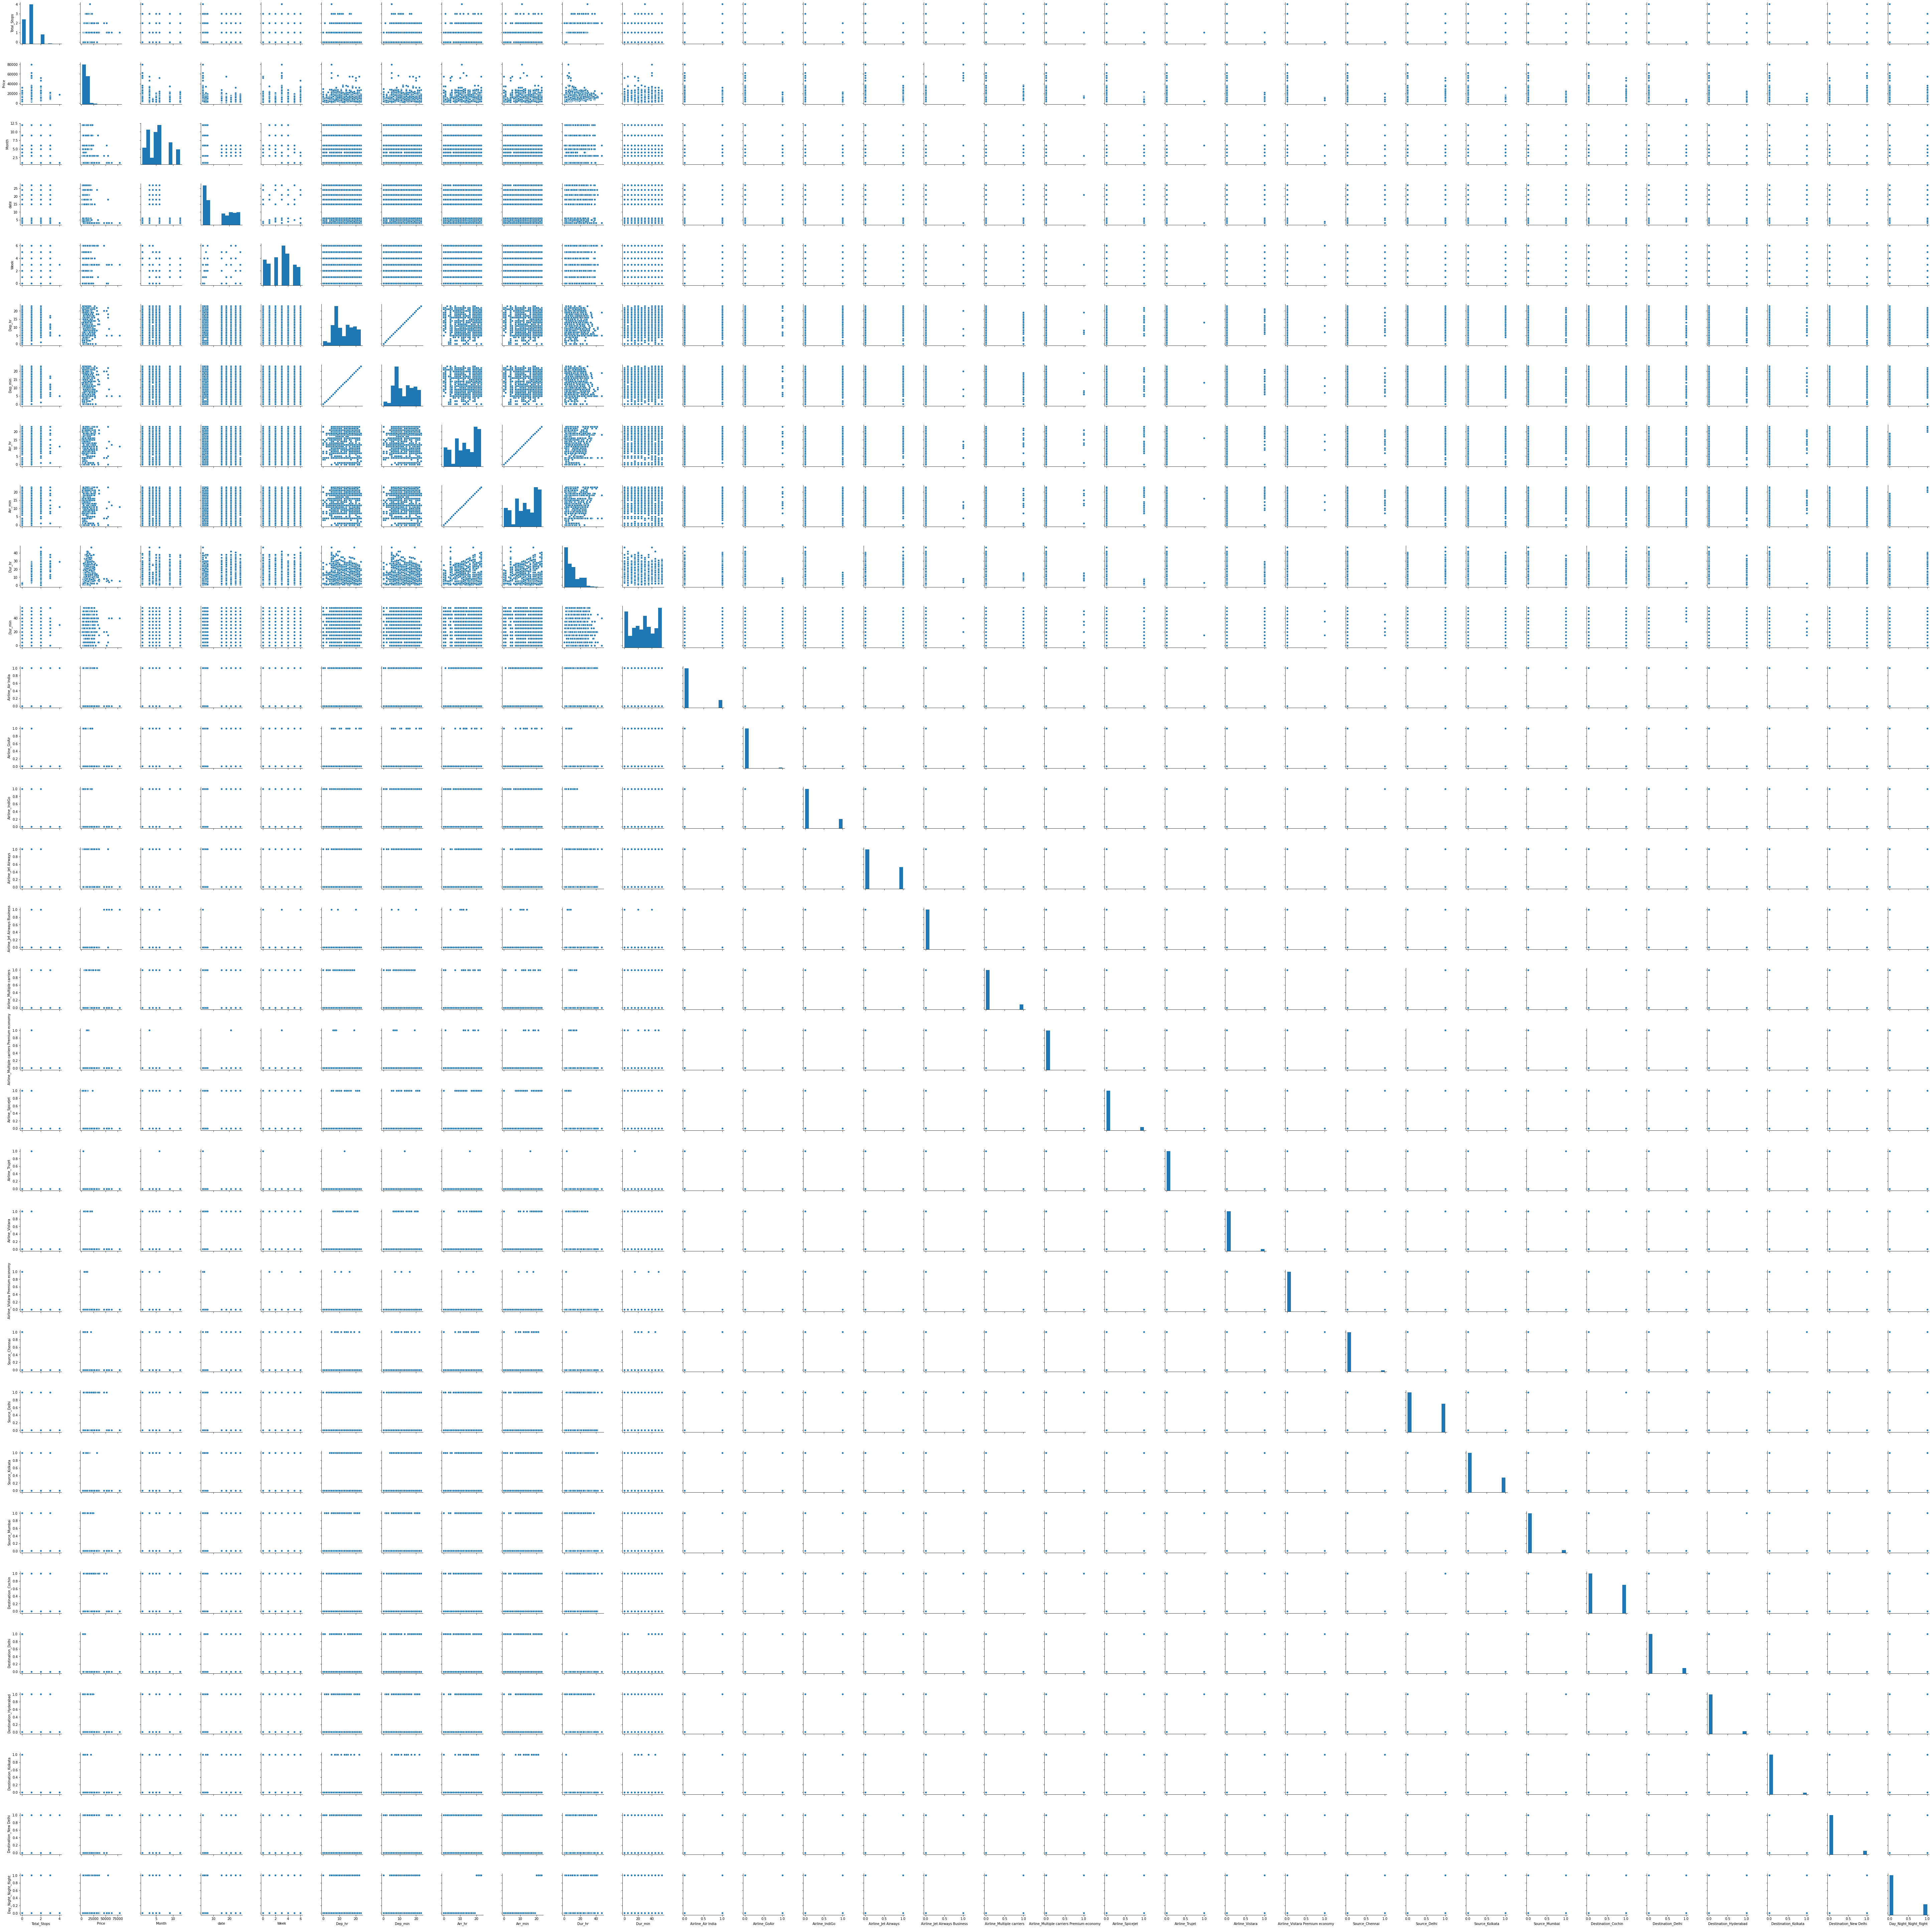

In [73]:
sns.pairplot(df)

In [74]:
corr_matrix=df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                                        1.000000
Total_Stops                                  0.601140
Dur_hr                                       0.503277
Airline_Jet Airways                          0.410592
Source_Delhi                                 0.260259
Destination_Cochin                           0.260259
Airline_Jet Airways Business                 0.255719
Destination_New Delhi                        0.199639
Airline_Multiple carriers                    0.145174
Airline_Air India                            0.049543
Arr_min                                      0.032217
Arr_hr                                       0.032217
Airline_Multiple carriers Premium economy    0.018191
Source_Kolkata                               0.014720
Month                                        0.008027
Dep_hr                                       0.006351
Dep_min                                      0.006351
Airline_Vistara Premium economy             -0.000270
Week                        

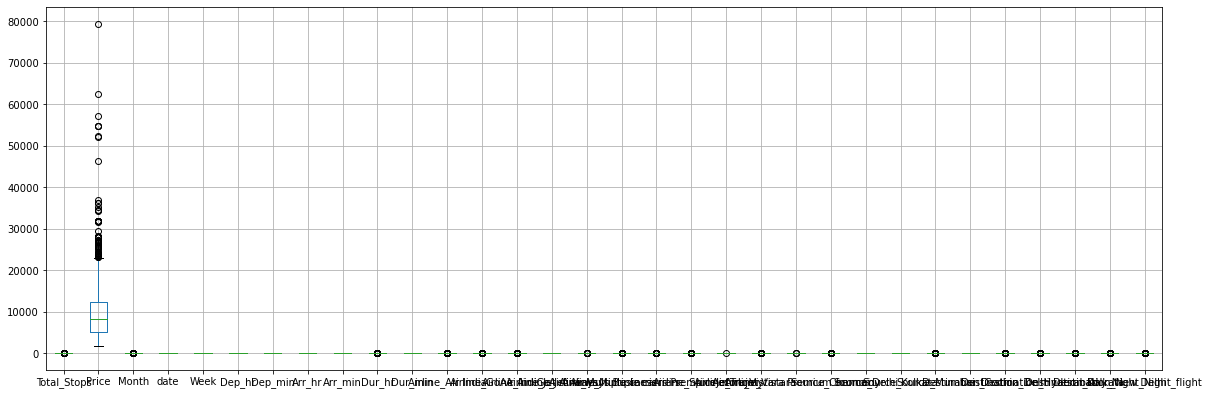

In [75]:
#outliers Checking
df.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [76]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(10439, 32)

In [77]:
threshold=3
print(np.where(z>3))

(array([    0,     4,     5, ..., 10433, 10437, 10437], dtype=int64), array([30, 30, 18, ..., 18, 20, 30], dtype=int64))


In [78]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(10439, 32)
(7288, 32)


In [79]:
loss_percentage=(10439-7288)/10439*100
print(loss_percentage)

30.184883609541142


It's a huge loss of data also we see that outliers is present in Price column so there is no need of removing outliers

# SPLITTING THE DATA

In [80]:
x=df.drop('Price',axis=1)
y=df['Price']

In [81]:
#checking skewness....no problem if we do it after splitting because correcting skewness won't delete any rows
x.skew()

Total_Stops                                    0.329489
Month                                          0.629812
date                                           0.375914
Week                                           0.001944
Dep_hr                                         0.110790
Dep_min                                        0.110790
Arr_hr                                        -0.376949
Arr_min                                       -0.376949
Dur_hr                                         0.889984
Dur_min                                       -0.083978
Airline_Air India                              1.832215
Airline_GoAir                                  7.130416
Airline_IndiGo                                 1.550364
Airline_Jet Airways                            0.608688
Airline_Jet Airways Business                  41.681329
Airline_Multiple carriers                      2.420607
Airline_Multiple carriers Premium economy     28.288358
Airline_SpiceJet                               3

In [82]:
from sklearn.preprocessing import power_transform

In [83]:
df=power_transform(x)
df=pd.DataFrame(df,columns=x.columns)

In [84]:
df.skew()

Total_Stops                                   -0.057369
Month                                         -0.026830
date                                           0.021024
Week                                          -0.172558
Dep_hr                                        -0.104222
Dep_min                                       -0.104222
Arr_hr                                        -0.358998
Arr_min                                       -0.358998
Dur_hr                                        -0.023509
Dur_min                                       -0.372594
Airline_Air India                              1.832215
Airline_GoAir                                  7.130416
Airline_IndiGo                                 1.550364
Airline_Jet Airways                            0.608688
Airline_Jet Airways Business                  41.681329
Airline_Multiple carriers                      2.420607
Airline_Multiple carriers Premium economy     28.288358
Airline_SpiceJet                               3

In [85]:
df

,Total_Stops,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
0,-1.293009,-0.817684,1.183960,1.602864,1.555403,1.555403,-1.792979,-1.792979,-1.166116,1.213628,...,-0.194629,-0.844391,-0.613851,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,3.232069,-0.515552
1,1.628283,-1.882685,-0.817103,1.124753,-1.356082,-1.356082,-0.062221,-0.062221,-0.029414,-0.090926,...,-0.194629,-0.844391,1.629059,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,-0.309399,-0.515552
2,1.628283,1.135539,-0.593428,0.629532,-0.547641,-0.547641,-1.367660,-1.367660,1.100202,-1.878264,...,-0.194629,1.184285,-0.613851,-0.267481,1.184285,-0.368322,-0.267481,-0.194629,-0.309399,-0.515552
3,0.391154,1.841386,-0.817103,0.112919,0.962411,0.962411,1.412571,1.412571,-0.370379,-0.090926,...,-0.194629,-0.844391,1.629059,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,-0.309399,1.939669
4,0.391154,-1.882685,-1.414439,0.112919,0.651188,0.651188,1.116234,1.116234,-0.583182,0.968096,...,-0.194629,-0.844391,-0.613851,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,3.232069,1.939669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10434,-1.293009,1.135539,-1.084078,-0.431863,1.114096,1.114096,1.264328,1.264328,-1.166116,0.188116,...,-0.194629,-0.844391,1.629059,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,-0.309399,1.939669
10435,-1.293009,-0.406354,1.336333,1.124753,1.263393,1.263393,1.412571,1.412571,-1.166116,0.456504,...,-0.194629,-0.844391,1.629059,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,-0.309399,1.939669
10436,-1.293009,-0.406354,1.336333,1.124753,-0.738217,-0.738217,-0.354681,-0.354681,-0.840214,-1.878264,...,-0.194629,-0.844391,-0.613851,-0.267481,-0.844391,2.715012,-0.267481,-0.194629,-0.309399,-0.515552
10437,-1.293009,-1.882685,-1.414439,0.112919,-0.183669,-0.183669,0.084381,0.084381,-1.166116,0.716057,...,-0.194629,-0.844391,-0.613851,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,3.232069,-0.515552


In [86]:
x

,Total_Stops,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
0,0,3,24,6,22,22,1,1,2,50,...,0,0,0,0,0,0,0,0,1,0
1,2,1,5,5,5,5,13,13,7,25,...,0,0,1,0,0,0,0,0,0,0
2,2,9,6,4,9,9,4,4,19,0,...,0,1,0,0,1,0,0,0,0,0
3,1,12,5,3,18,18,23,23,5,25,...,0,0,1,0,0,0,0,0,0,1
4,1,1,3,3,16,16,21,21,4,45,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,2,19,19,22,22,2,30,...,0,0,1,0,0,0,0,0,0,1
10679,0,4,27,5,20,20,23,23,2,35,...,0,0,1,0,0,0,0,0,0,1
10680,0,4,27,5,8,8,11,11,3,0,...,0,0,0,0,0,1,0,0,0,0
10681,0,1,3,3,11,11,14,14,2,40,...,0,0,0,0,0,0,0,0,1,0


In [87]:
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [88]:
x.skew()

Total_Stops                                    0.329489
Month                                          0.629812
date                                           0.375914
Week                                           0.001944
Dep_hr                                         0.110790
Dep_min                                        0.110790
Arr_hr                                        -0.376949
Arr_min                                       -0.376949
Dur_hr                                         0.889984
Dur_min                                       -0.083978
Airline_Air India                              1.832215
Airline_GoAir                                  7.130416
Airline_IndiGo                                 1.550364
Airline_Jet Airways                            0.608688
Airline_Jet Airways Business                  41.681329
Airline_Multiple carriers                      2.420607
Airline_Multiple carriers Premium economy     28.288358
Airline_SpiceJet                               3

In [89]:
df_new.skew()

Total_Stops                                   -0.057369
Month                                         -0.026830
date                                           0.021024
Week                                          -0.172558
Dep_hr                                        -0.104222
Dep_min                                       -0.104222
Arr_hr                                        -0.358998
Arr_min                                       -0.358998
Dur_hr                                        -0.023509
Dur_min                                       -0.372594
Airline_Air India                              1.832215
Airline_GoAir                                  7.130416
Airline_IndiGo                                 1.550364
Airline_Jet Airways                            0.608688
Airline_Jet Airways Business                  41.681329
Airline_Multiple carriers                      2.420607
Airline_Multiple carriers Premium economy     28.288358
Airline_SpiceJet                               3

In [90]:
df_new

,Total_Stops,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
0,-1.293009,-0.817684,1.183960,1.602864,1.555403,1.555403,-1.792979,-1.792979,-1.166116,1.213628,...,-0.194629,-0.844391,-0.613851,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,3.232069,-0.515552
1,1.628283,-1.882685,-0.817103,1.124753,-1.356082,-1.356082,-0.062221,-0.062221,-0.029414,-0.090926,...,-0.194629,-0.844391,1.629059,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,-0.309399,-0.515552
2,1.628283,1.135539,-0.593428,0.629532,-0.547641,-0.547641,-1.367660,-1.367660,1.100202,-1.878264,...,-0.194629,1.184285,-0.613851,-0.267481,1.184285,-0.368322,-0.267481,-0.194629,-0.309399,-0.515552
3,0.391154,1.841386,-0.817103,0.112919,0.962411,0.962411,1.412571,1.412571,-0.370379,-0.090926,...,-0.194629,-0.844391,1.629059,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,-0.309399,1.939669
4,0.391154,-1.882685,-1.414439,0.112919,0.651188,0.651188,1.116234,1.116234,-0.583182,0.968096,...,-0.194629,-0.844391,-0.613851,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,3.232069,1.939669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10434,-1.293009,1.135539,-1.084078,-0.431863,1.114096,1.114096,1.264328,1.264328,-1.166116,0.188116,...,-0.194629,-0.844391,1.629059,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,-0.309399,1.939669
10435,-1.293009,-0.406354,1.336333,1.124753,1.263393,1.263393,1.412571,1.412571,-1.166116,0.456504,...,-0.194629,-0.844391,1.629059,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,-0.309399,1.939669
10436,-1.293009,-0.406354,1.336333,1.124753,-0.738217,-0.738217,-0.354681,-0.354681,-0.840214,-1.878264,...,-0.194629,-0.844391,-0.613851,-0.267481,-0.844391,2.715012,-0.267481,-0.194629,-0.309399,-0.515552
10437,-1.293009,-1.882685,-1.414439,0.112919,-0.183669,-0.183669,0.084381,0.084381,-1.166116,0.716057,...,-0.194629,-0.844391,-0.613851,-0.267481,-0.844391,-0.368322,-0.267481,-0.194629,3.232069,-0.515552


In [91]:
x=df_new#saving the data in new variable

# MODEL TRAINING

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.29300877, -0.81768437,  1.1839604 , ..., -0.19462861,
         3.2320693 , -0.51555176],
       [ 1.62828278, -1.88268487, -0.81710307, ..., -0.19462861,
        -0.30939931, -0.51555176],
       [ 1.62828278,  1.13553855, -0.59342753, ..., -0.19462861,
        -0.30939931, -0.51555176],
       ...,
       [-1.29300877, -0.40635397,  1.33633337, ..., -0.19462861,
        -0.30939931, -0.51555176],
       [-1.29300877, -1.88268487, -1.41443926, ..., -0.19462861,
         3.2320693 , -0.51555176],
       [ 1.62828278,  1.13553855, -0.81710307, ..., -0.19462861,
        -0.30939931, -0.51555176]])

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [94]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    RMS=r2_score(y_test,predlr)
    if RMS>maxAccu:
        maxAccu=RMS
        maxRS=i
print("Best R2 Score is: ",maxAccu,"on Random_state: ",maxRS)

Best R2 Score is:  0.6785627402233112 on Random_state:  555


In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=555)

In [96]:
def eval(x):
    mod=x
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print("r2 score: ",r2_score(y_test,pred))
    print("Error:")
    print("Mean_Absolute_Error: ",mean_absolute_error(y_test,pred))
    print("Mean_Squared_Error: ",mean_squared_error(y_test,pred))
    print("Root_Mean_Squared_Error: ",np.sqrt(mean_squared_error(y_test,pred)))

In [97]:
eval(LinearRegression())

r2 score:  0.6785627402233112
Error:
Mean_Absolute_Error:  1908.7675065011892
Mean_Squared_Error:  7185388.880007843
Root_Mean_Squared_Error:  2680.5575688665676


In [98]:
eval(DecisionTreeRegressor())

r2 score:  0.6588527006372711
Error:
Mean_Absolute_Error:  1413.8966368667516
Mean_Squared_Error:  7625985.901536824
Root_Mean_Squared_Error:  2761.5187671889585


In [99]:
eval(RandomForestRegressor())

r2 score:  0.7927082173157272
Error:
Mean_Absolute_Error:  1190.1527478503563
Mean_Squared_Error:  4633787.854125413
Root_Mean_Squared_Error:  2152.623481736974


In [100]:
eval(SVR())

r2 score:  0.0461396212059636
Error:
Mean_Absolute_Error:  3429.2896824292684
Mean_Squared_Error:  21322536.670541238
Root_Mean_Squared_Error:  4617.63323257069


In [101]:
scr=cross_val_score(LinearRegression(),x,y,cv=5)
print("scr for LR",scr.mean())

scr for LR -5.831108032430356e+24


In [102]:
scr=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print("scr for DTR",scr.mean())

scr for DTR 0.679004280205042


In [103]:
scr=cross_val_score(RandomForestRegressor(),x,y,cv=5)
print("scr for RFR",scr.mean())

scr for RFR 0.7913546489125067


In [104]:
scr=cross_val_score(SVR(),x,y,cv=5)
print("scr for SVM",scr.mean())

scr for SVM 0.052995052984402324


In [105]:
#calculating differencec between accuracy score and cv score
LR1=(.6785+5)*100
DTR1=(.6588-.6790)*100
RFR1=(.7927-.7913)*100
SVR1=(.04-.05)*100

In [106]:
LR1

567.8499999999999

In [107]:
DTR1

-2.0199999999999996

In [108]:
RFR1

0.13999999999999568

In [109]:
SVR1

-1.0000000000000002

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
#parameters for DTR()
parameters={"criterion":['mse', 'friedman_mse', 'mae', 'poisson'],
           "splitter":['best','random'],'max_depth' : np.arange(2,15)}

In [112]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)

In [113]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'splitter': ['best', 'random']})

In [114]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 11, 'splitter': 'random'}

In [115]:
DTR_mod=DecisionTreeRegressor(criterion='friedman_mse',max_depth=11,splitter='random')
DTR_mod.fit(x_train,y_train)
pred=DTR_mod.predict(x_test)
print(r2_score(y_test,pred)*100)

74.84685489308107


In [ ]:
Hyperparameter Tuning Increased the r2 score

In [116]:
import joblib
joblib.dump(DTR_mod,"Flight_Price_Prediction_Final_result.pkl")

['Flight_Price_Prediction_Final_result.pkl']